# Linear Regression Analysis and Prediction for IoT

This notebook holds the Assignment 3.1 for Module 3 in AAI 530, Data Analytics and the Internet of Things. In this assignment, you will use linear regression to make predictions for simulated "streaming" data. The work that you do in this assignment will build on the linear regression predictions that you saw in your text book and in this week's lab session. Be sure to answer the analysis questions thoroughly, as this is a large part of the assignment for this week.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PROJ_DIR="/content/drive/MyDrive/0001_Sachin/e-learning/01_USD/aai_530/m3"
DATA_DIR=f"{PROJ_DIR}/data"

FILE_NAME="household_power_clean.csv"
ABSOLUTE_FILE_PATH=f"{DATA_DIR}/{FILE_NAME}"

! ls -ltr $ABSOLUTE_FILE_PATH
!wc -l $ABSOLUTE_FILE_PATH
!head -n 10 $ABSOLUTE_FILE_PATH

-rw------- 1 root root 313098869 Oct 19  2022 /content/drive/MyDrive/0001_Sachin/e-learning/01_USD/aai_530/m3/data/household_power_clean.csv
2049281 /content/drive/MyDrive/0001_Sachin/e-learning/01_USD/aai_530/m3/data/household_power_clean.csv
,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,,,,
1,2006-12-16,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,,,,
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,,,,
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,,,,
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,,,,
5,2006-12-16,17:29:00,3.52,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00,,,,
6,2006-12-16,17:30:00,3.702,0.52,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00,,,,
7

In [5]:
df_raw = pd.read_csv(f"{ABSOLUTE_FILE_PATH}", delimiter=",")
df_raw.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
0,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,NaN,NaN,NaN,NaN
1,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,NaN,NaN,NaN,NaN
2,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,NaN,NaN,NaN,NaN
3,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,NaN,NaN,NaN,NaN
4,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,NaN,NaN,NaN,NaN


In [6]:
df = df_raw.copy()
df["Datetime_Formatted"] = pd.to_datetime(df["Date"] + " " + df["Time"],format="%Y-%m-%d %H:%M:%S")

df['Date'] = df['Datetime_Formatted'].dt.date
df['Time'] = df['Datetime_Formatted'].dt.time

df.dtypes


,0
Unnamed: 0,int64
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [7]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,gap_monthly,grp_monthly,v_monthly,gi_monthly,Datetime_Formatted
count,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049280
mean,1031495.73996,1.09162,0.12371,240.83986,4.62776,1.12192,1.29852,6.45845,1.09159,0.12371,240.83991,4.62766,2008-12-02 00:59:44.397740544
min,0.00000,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,0.08167,0.00000,225.58733,0.22000,2006-12-16 17:24:00
25%,516253.75000,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,0.33013,0.06960,239.10500,1.46000,2007-12-10 05:37:45
50%,1028638.50000,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,0.71433,0.10300,240.98400,3.07333,2008-11-30 01:22:30
75%,1545307.25000,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,1.56993,0.15933,242.76700,6.56000,2009-11-23 20:31:15
max,2075258.00000,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,7.96620,0.78973,252.44233,34.23333,2010-11-26 21:02:00
std,596458.61014,1.05729,0.11272,3.23999,4.44440,6.15303,5.82203,8.43715,0.95162,0.07737,3.08063,3.98798,NaN


<Axes: >

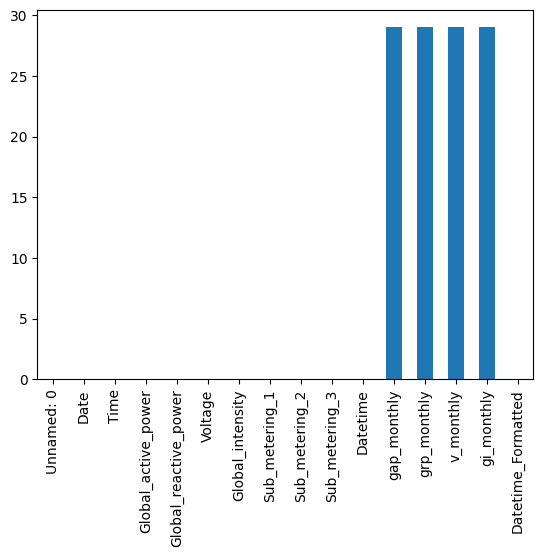

In [8]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

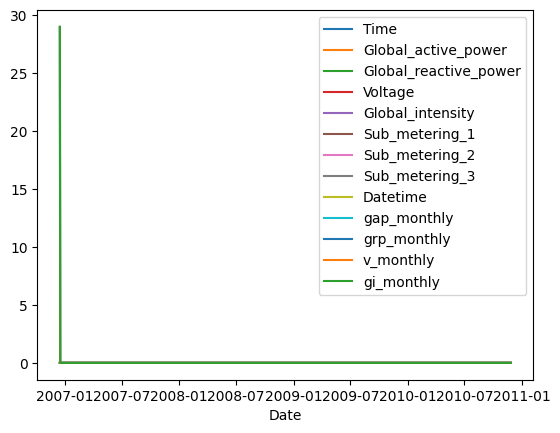

In [9]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

In [10]:
# Set datetime index but keep the column
df = df.set_index("Datetime_Formatted", drop=False).sort_index()

# Convert object columns where possible (future-proof)
df = df.infer_objects(copy=False)

# --------------------------------------------------
# Drop dates with excessive missing data (>30%)
# --------------------------------------------------
missing_by_day = (
    df.isna()
      .groupby(df.index.normalize())
      .mean()
)

bad_days = missing_by_day[
    missing_by_day.mean(axis=1) > 0.30
].index

df = df[~df.index.normalize().isin(bad_days)]

# --------------------------------------------------
# Time-based interpolation (numeric columns only)
# --------------------------------------------------
num_cols = df.select_dtypes(include="number").columns

df[num_cols] = df[num_cols].interpolate(method="time")

# --------------------------------------------------
# Clean up edge NaNs
# -----

df = df.ffill().bfill()


In [11]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,gap_monthly,grp_monthly,v_monthly,gi_monthly,Datetime_Formatted
count,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280
mean,1031495.73996,1.09162,0.12371,240.83986,4.62776,1.12192,1.29852,6.45845,1.09164,0.12372,240.83983,4.62786,2008-12-02 00:59:44.397740544
min,0.00000,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,0.08167,0.00000,225.58733,0.22000,2006-12-16 17:24:00
25%,516253.75000,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,0.33013,0.06960,239.10500,1.46000,2007-12-10 05:37:45
50%,1028638.50000,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,0.71440,0.10300,240.98400,3.07333,2008-11-30 01:22:30
75%,1545307.25000,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,1.57000,0.15933,242.76700,6.56000,2009-11-23 20:31:15
max,2075258.00000,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,7.96620,0.78973,252.44233,34.23333,2010-11-26 21:02:00
std,596458.61014,1.05729,0.11272,3.23999,4.44440,6.15303,5.82203,8.43715,0.95169,0.07737,3.08069,3.98829,NaN


### The Empty Graph below shows that the missing data has been filled ###

<Axes: >

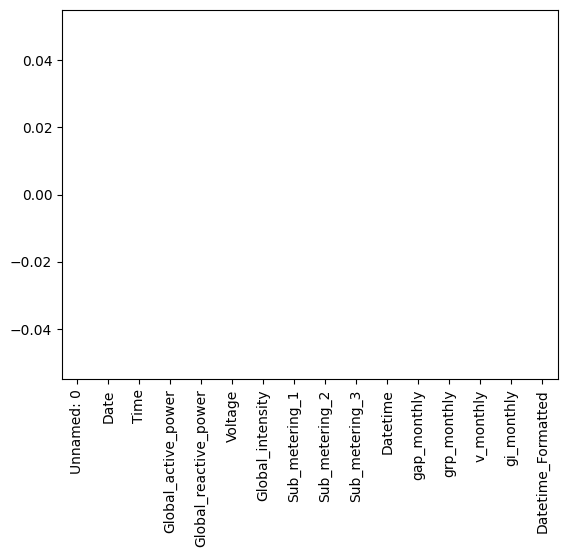

In [12]:
df.isna().sum().plot.bar()


## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [ ]:
#Load your data into a pandas dataframe here
# DataFrame is already loaded in the variable df.

In [13]:
#convert datetime to epoch/unix time
df['unix'] = df["Datetime_Formatted"].astype("int64") // 10**9
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly,Datetime_Formatted,unix
Datetime_Formatted,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,4.33873,0.26067,234.63133,18.60000,2006-12-16 17:24:00,1166289840
2006-12-16 17:25:00,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,4.33873,0.26067,234.63133,18.60000,2006-12-16 17:25:00,1166289900
2006-12-16 17:26:00,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,4.33873,0.26067,234.63133,18.60000,2006-12-16 17:26:00,1166289960
2006-12-16 17:27:00,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,4.33873,0.26067,234.63133,18.60000,2006-12-16 17:27:00,1166290020
2006-12-16 17:28:00,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,4.33873,0.26067,234.63133,18.60000,2006-12-16 17:28:00,1166290080


## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A: ph is the prediction horizon — how far into the future the model predicts Global Active Power. It defines the time offset between the input and the target output.
And mu is Forgetting factor. Basically it defines how relevant the past data is in the future prediction. mu value being one is it gives equal weightage to all the past data however a small value means the recent data is more relevant than the old data while making the predictions.

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [14]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Global_active_power)

ph = 300 #5 minutes
ph_index = 5 #ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: the first data point would have negligible influence on the 5000th prediction. mathematically it's 0.9**4999 which is nearly Zero

**TODO: Following the code from Chapter 9 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

In [ ]:
for i in range(2, n_s+1):  # start with 2 leading datapoints
    # get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    # assign weights using forgetting factor μ
    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weight based on distance from current prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)  # optional: ensure newest point has highest weight

    lm_tmp = LinearRegression()
    model_tmp=lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_[0]
    q_tmp = model_tmp.intercept_

    # print(f"m_tmp is: {m_tmp}, and q_tmp is : {q_tmp}")

    # Prediction
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp

    # store predictions
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


Now let's visualize the results from our model.

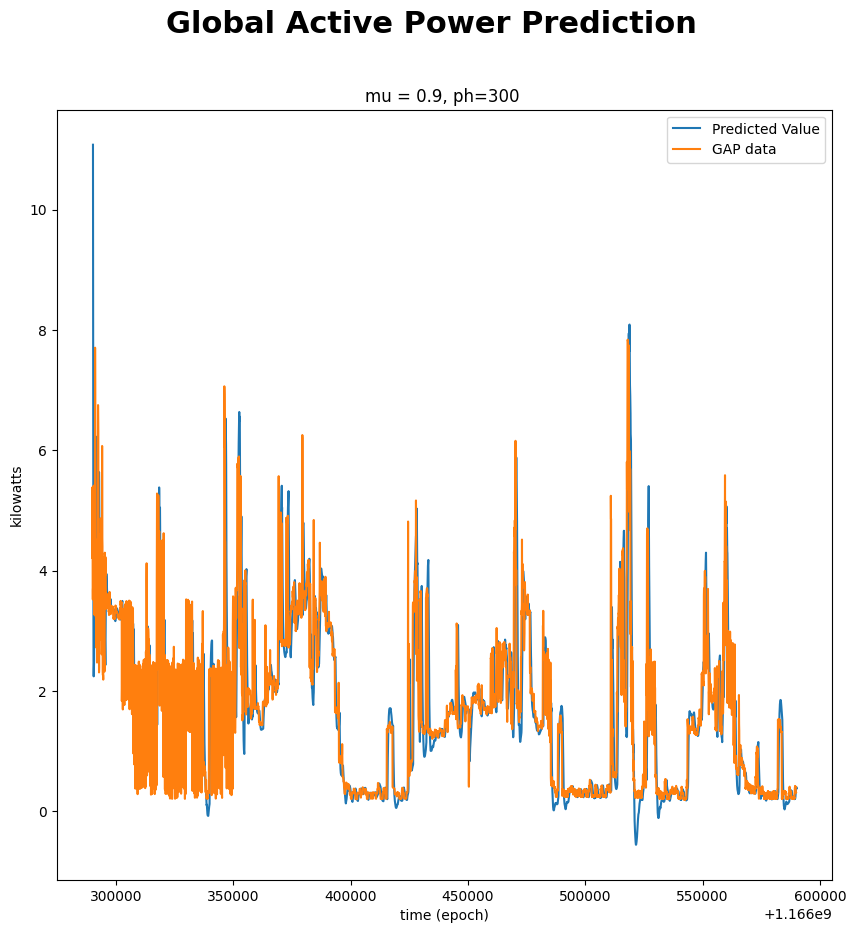

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

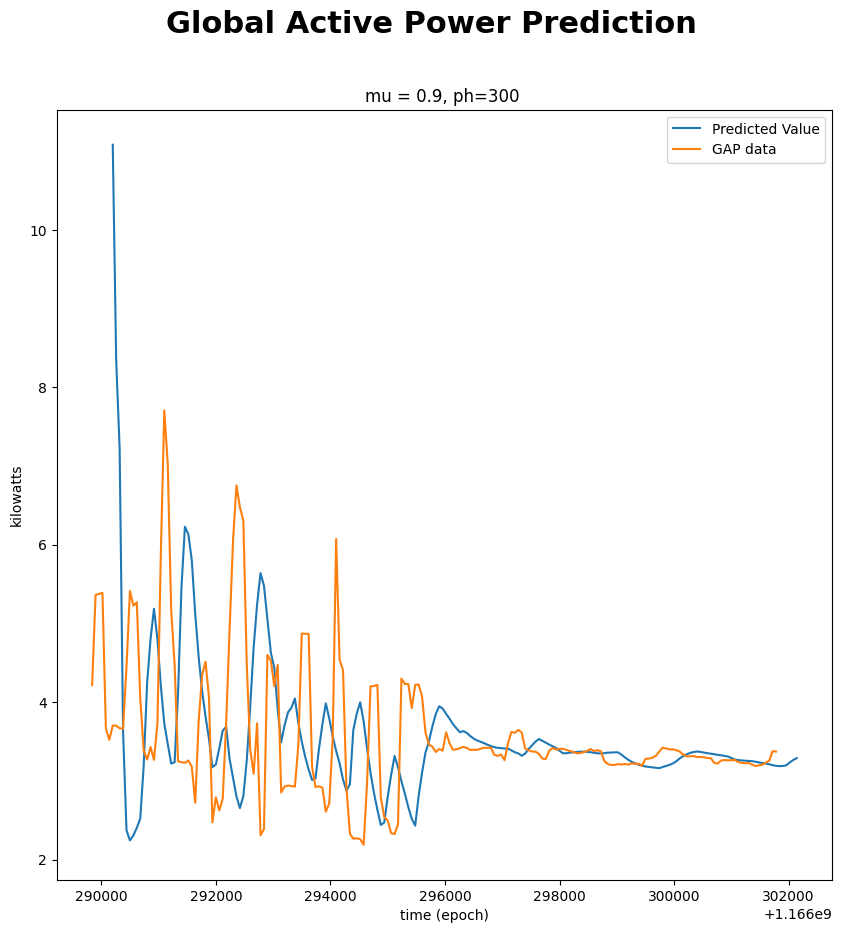

In [17]:
#Plot first 200 data points/predictions

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

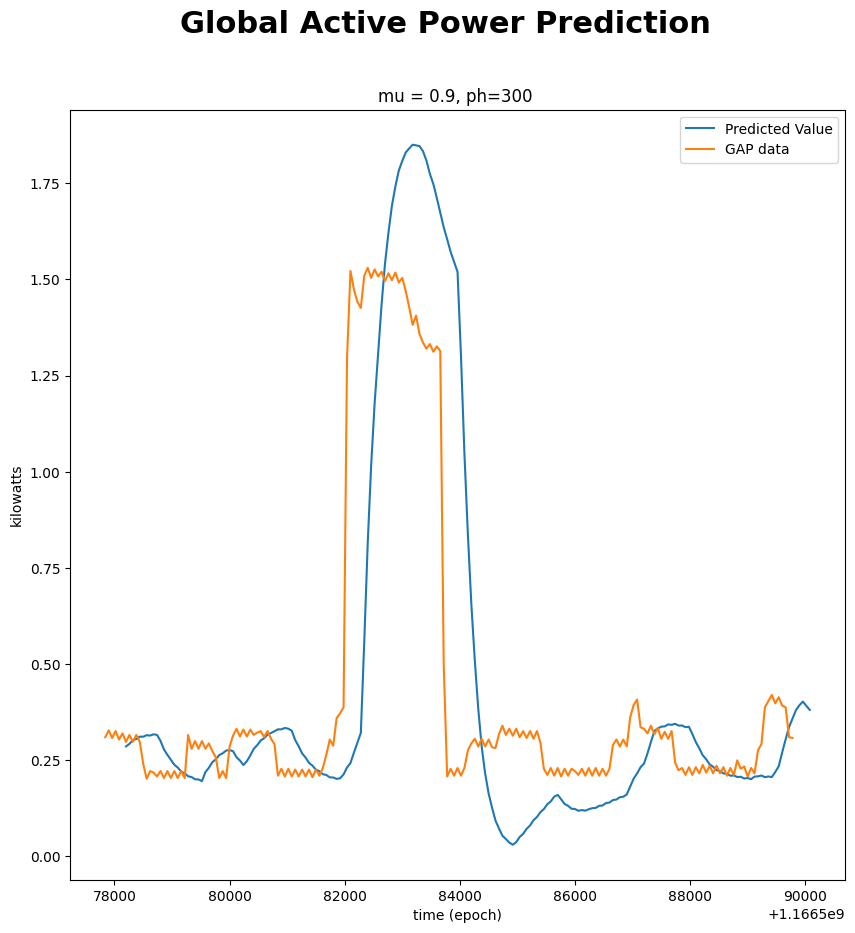

In [18]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[n_s-200:n_s], yp_pred[n_s-200:n_s], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:ns,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()


# fig, ax = plt.subplots(figsize=(12,4))
# ax.plot(ts.iloc[-200:, 0], ys.iloc[-200:, 0], label='GAP data')
# ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted GAP', linestyle='--', color='red')
# ax.set_title("Rolling Linear Regression Predictions — Last 200 Points")
# ax.set_xlabel("Time")
# ax.set_ylabel("Global Active Power (GAP)")
# ax.legend()
# plt.show()

In [19]:
#Calculate MSE of predictions
from sklearn.metrics import mean_squared_error as mse
print("MSE is", mse(ys['Global_active_power'][ph_index:n_s+ph_index-1],yp_pred))

MSE is 0.5987740533898929


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: The rolling linear regression with forgetting factor μ = 0.9 captures general trends in Global Active Power (GAP) reasonably well.

It is able to predict short-term increases or decreases in power usage, especially when the pattern is relatively smooth.

However, it may struggle with sharp spikes or sudden drops, because linear regression is a simple, memory-limited model.

Specially we can see towards the last data point where there were sharp spike, the model just perform moderately and not great.

**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

In [ ]:
#Re-run prediction code for mu = 1
mu = 1.0
for i in range(2, n_s+1):  # start with 2 leading datapoints
    # get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    # assign weights using forgetting factor μ
    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weight based on distance from current prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)  # optional: ensure newest point has highest weight

    lm_tmp = LinearRegression()
    model_tmp=lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_[0]
    q_tmp = model_tmp.intercept_

    # print(f"m_tmp is: {m_tmp}, and q_tmp is : {q_tmp}")

    # Prediction
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp

    # store predictions
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


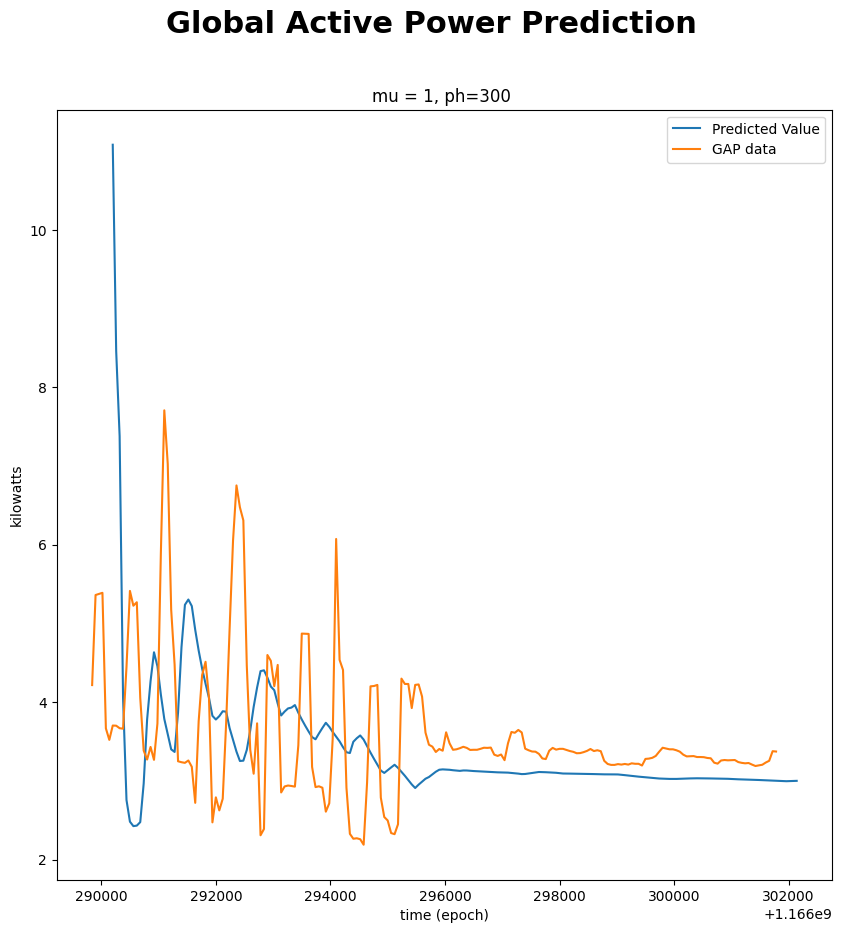

In [21]:
#Plot first 200 data points/predictions for mu = 1

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

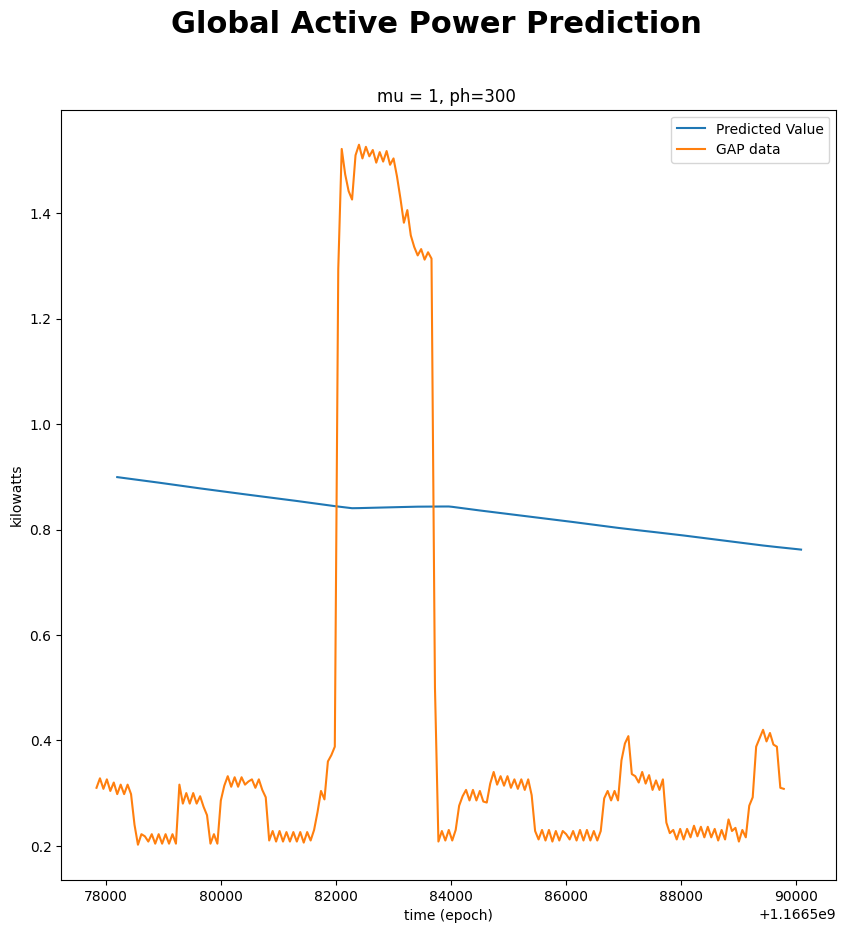

In [22]:
#Plot last 200 data points/predictions for mu = 1

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[n_s-200:n_s], yp_pred[n_s-200:n_s], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:ns,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()


In [23]:
#Calculate MSE of predictions for mu = 1

print("MSE is", mse(ys['Global_active_power'][ph_index:n_s+ph_index-1],yp_pred))

MSE is 1.4433474819593302


In [ ]:
#Re-run prediction code for mu = 0.01

mu = 0.01

for i in range(2, n_s+1):  # start with 2 leading datapoints
    # get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    # assign weights using forgetting factor μ
    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weight based on distance from current prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)  # optional: ensure newest point has highest weight

    lm_tmp = LinearRegression()
    model_tmp=lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_[0]
    q_tmp = model_tmp.intercept_

    # print(f"m_tmp is: {m_tmp}, and q_tmp is : {q_tmp}")

    # Prediction
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp

    # store predictions
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


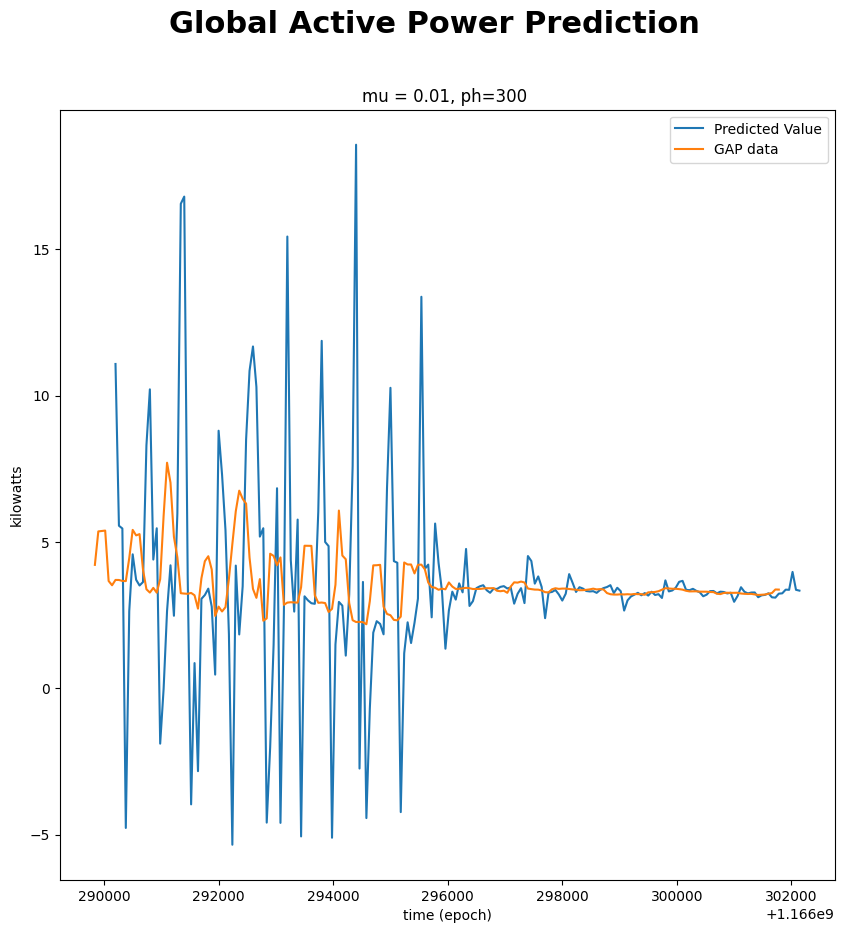

In [25]:
#Plot first 200 data points/predictions for mu = 0.01

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

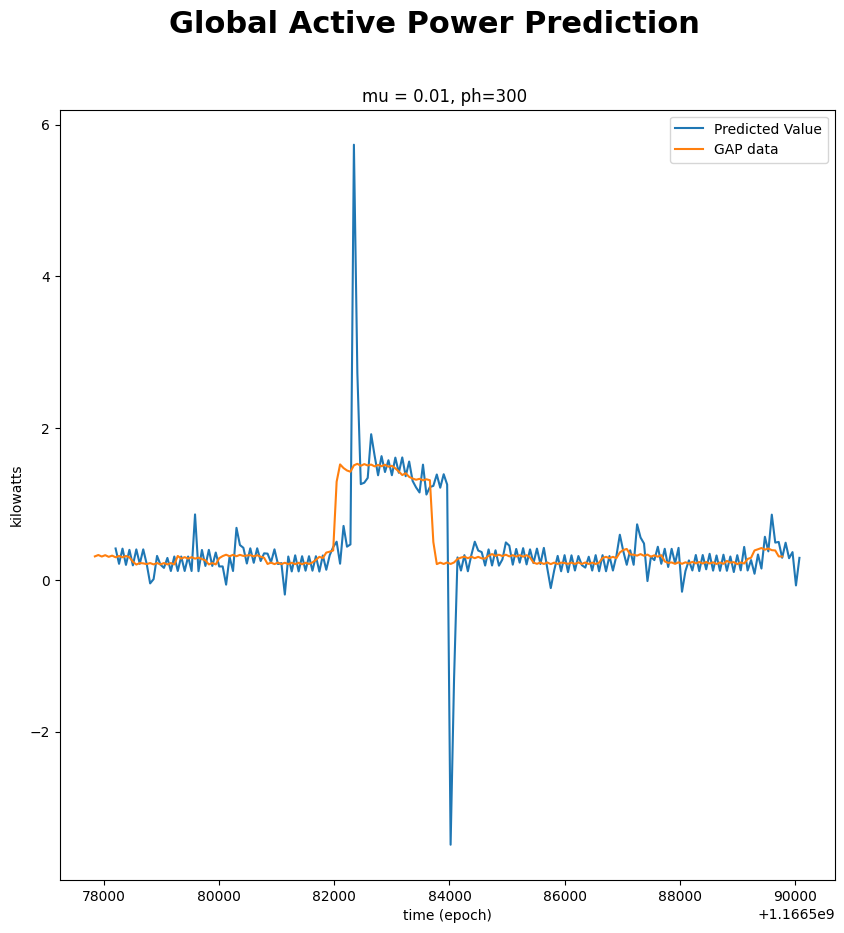

In [26]:
#Plot last 200 data points/predictions for mu = 0.01

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[n_s-200:n_s], yp_pred[n_s-200:n_s], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:ns,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [27]:
#Calculate MSE of predictions for mu = 0.01
print("MSE is", mse(ys['Global_active_power'][ph_index:n_s+ph_index-1],yp_pred))

MSE is 7.985307094756632


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: mu =1, didn't perform very well compare to the mu=0.9 because depending on the time of the day usage varies and hence it's not a liner graph. with forgetting factor 0.9 it keeps giving less weightage to the older data which resulted into better prediction but with mu=1, thats not true and hence the predictions were not as great as mu=0.9

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: this performed worst, because it practically give weightage only to the very recent data and hence predictions were not that great. it's too sharp and seems unstable.

**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A: the best one is for mu=0.9 for the same reason as explained earlier. mu=1 considered every data equal weighatage which is not a good strategy for these kind of data (which are not exactly liner) but with mu=0.01 it introduced a lot of noice and didn't give any weightage to a little older data even

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A: mu is currently fixed now, but it could be adaptive. if data is more stable then mu should be increased and if not that stable then decrease it dynamically

**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [33]:
#add voltage to the x-variables in our dataset
ts = pd.DataFrame(df.unix)
vs = pd.DataFrame(df.Voltage)
ys = pd.DataFrame(df.Global_active_power)

X = pd.concat([ts, vs], axis=1)

print(X)
ph = 300 #5 minutes
ph_index = 5
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

                           unix   Voltage
Datetime_Formatted                       
2006-12-16 17:24:00  1166289840 234.84000
2006-12-16 17:25:00  1166289900 233.63000
2006-12-16 17:26:00  1166289960 233.29000
2006-12-16 17:27:00  1166290020 233.74000
2006-12-16 17:28:00  1166290080 235.68000
...                         ...       ...
2010-11-26 20:58:00  1290805080 240.43000
2010-11-26 20:59:00  1290805140 240.00000
2010-11-26 21:00:00  1290805200 239.82000
2010-11-26 21:01:00  1290805260 239.70000
2010-11-26 21:02:00  1290805320 239.55000

[2049280 rows x 2 columns]


In [ ]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage

for i in range(2, n_s+1):  # start with 2 leading datapoints
    # get x and y data "available" for our prediction
    X_tmp = X[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    # assign weights using forgetting factor μ
    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weight based on distance from current prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)  # optional: ensure newest point has highest weight

    lm_tmp = LinearRegression()
    model_tmp=lm_tmp.fit(X_tmp, ys_tmp, sample_weight=weights)
    # Prediction time
    t_future = ts.iloc[i-1, 0] + ph
    v_now = vs.iloc[i-1, 0]              # assume voltage stays constant

    X_pred = np.array([[t_future, v_now]])

    yp = lm_tmp.predict(X_pred)[0]

    tp_pred[i-2] = t_future
    yp_pred[i-2] = yp

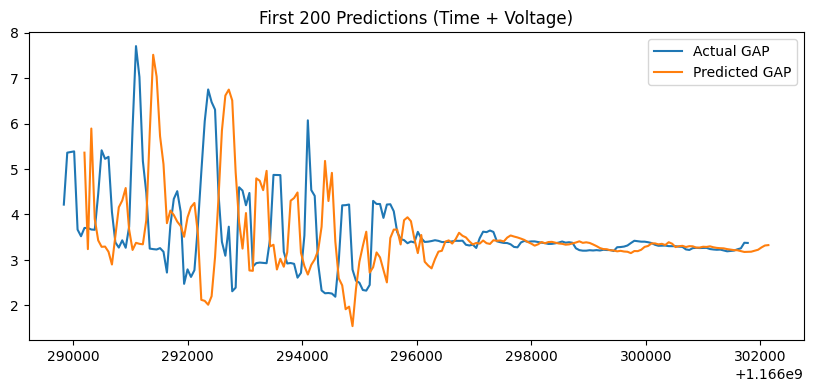

In [35]:
#Plot first 200 data points/predictions for the expanded dataset

plt.figure(figsize=(10,4))
plt.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='Actual GAP')
plt.plot(tp_pred[:200], yp_pred[:200], label='Predicted GAP')
plt.title('First 200 Predictions (Time + Voltage)')
plt.legend()
plt.show()

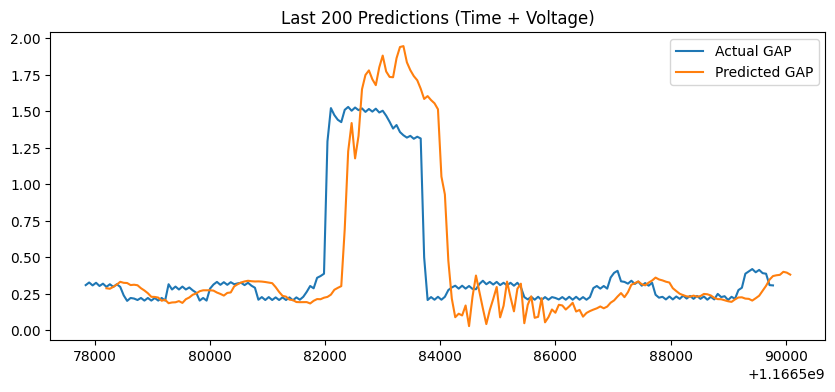

In [38]:
#Plot last 200 data points/predictions for the expanded data
plt.figure(figsize=(10,4))
plt.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='Actual GAP')
plt.plot(tp_pred[n_s-200:n_s], yp_pred[n_s-200:n_s], label='Predicted GAP')
plt.title('Last 200 Predictions (Time + Voltage)')
plt.legend()
plt.show()

In [40]:
#Calculate MSE of predictions for the expanded data

mse_val = mse(
    ys['Global_active_power'][ph_index:n_s+ph_index-1],
    yp_pred
)

print("MSE is", round(mse_val, 3))

MSE is 0.597


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: When we added voltage as a second input variable, the model’s performance clearly improved compared to the time-only regression.

There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: Moving average may perform better because it takes the recent number of points and completely discarding the old data altogether.

In [45]:
#create your alternative training data here

ma_window = 60
df['GAP_MA'] = df['Global_active_power'].rolling(ma_window).mean()
df_ma = df.dropna().reset_index(drop=True)

ts = pd.DataFrame(df_ma.unix)
ys = pd.DataFrame(df_ma.GAP_MA)

ph = 300 #5 minutes
ph_index = 5
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
#you may need to adjust these
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [ ]:
#re-run the prediction code here

for i in range(2, n_s+1):  # start with 2 leading datapoints
    # get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    # assign weights using forgetting factor μ
    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weight based on distance from current prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)  # optional: ensure newest point has highest weight

    lm_tmp = LinearRegression()
    model_tmp=lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_[0]
    q_tmp = model_tmp.intercept_

    # print(f"m_tmp is: {m_tmp}, and q_tmp is : {q_tmp}")

    # Prediction
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp * tp + q_tmp

    # store predictions
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


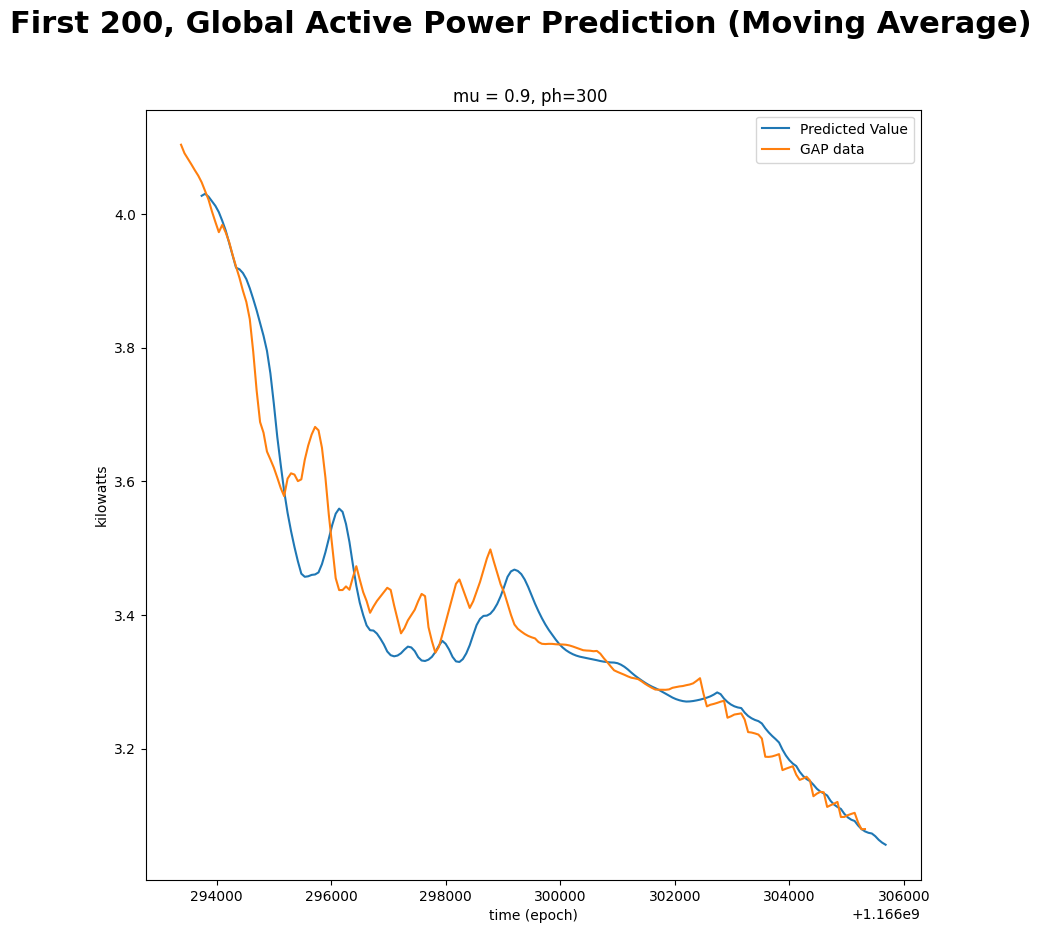

In [48]:
#Plot first 200 data points/predictions for alternative model

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('First 200, Global Active Power Prediction (Moving Average)', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

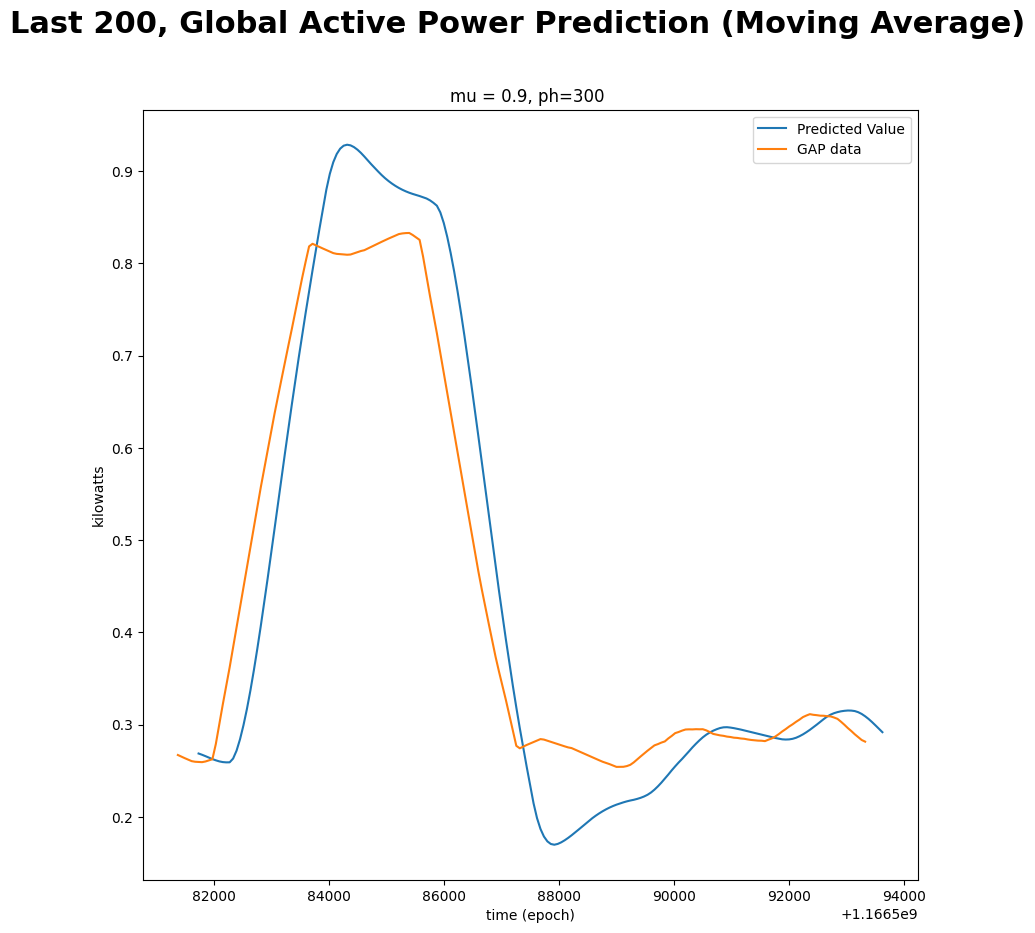

In [49]:
#Plot last 200 data points/predictions for alternative model

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Last 200, Global Active Power Prediction (Moving Average)', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[n_s-200:n_s], yp_pred[n_s-200:n_s], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [51]:
#Calculate MSE of predictions for alternative model
print("MSE is", mse(ys['GAP_MA'][ph_index:n_s+ph_index-1],yp_pred))

MSE is 0.014888863489663784


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A: This drastically improved the performace which is quite visible in a very low value of MSE
Few more things could be done to improve further e.g. polynomial fit instead of just linear OR Using Regularization (L1 or L2). Also more meantinful feature which are impacting the response variable could be included in the input.

It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

In [54]:
# Install nbconvert and LaTeX (needed for PDF)
!pip install nbconvert
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra


# Convert notebook to PDF
!jupyter nbconvert --to pdf /content/drive/MyDrive/0001_Sachin/e-learning/01_USD/aai_530/m3/Sachin_Assignment_3.ipynb


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,735 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest ve